# Barnes Interpolation (1st and 2nd Pass) Simulation Code

**Author:** Kayla Barginda 

***

**About**

JupyterLab file for the simulating the Barnes Interpolation (two-dimensions) using simulated data with real positions.
    
The disaggregation of the data was conducted by using CoGran via the Terminal. For the real data, the CoGran tool is executed within a Python script for acessibility reasons. 
    
Specification for CoGran: 
    
For the simulated Hamburg data: 
  - target = hamburg_citydistricts
  - input file = simulatedInterpolation_as_polygon_HamburgDE_30x30.geojson
  - result = simulatedDisaggregation_relArealWeighting_HamburgDE_30x30.geojson

For the simulated London data: 
  - target = london_citydistricts
  - input file = simulatedInterpolation_as_polygon_LondonUK_30x30.geojson
  - result = simulatedDisaggregation_relArealWeighting_LondonUK_30x30.geojson
    
This file *only* runs the simulated data and should be used as a guide. See README for detailed description of all functions.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as patches
import matplotlib.cm as cm
import numpy as np

import pandas as pd
import geopandas
from shapely.geometry import shape, Point, Polygon, MultiPolygon
import os

import locale
locale.setlocale(locale.LC_NUMERIC, "de_DE")
plt.rcdefaults()
plt.rcParams['axes.formatter.use_locale'] = True

numInterpolTiles = 30

/Users/kayla/opt/miniconda3/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


**To simulate the interpolation/disaggregation with simulated London data, replace the following:**

**For the Groundtruth:**

```xGroundTruth = np.linspace(9.7, 10.4, 200)``` with 
```xGroundTruth = np.linspace(-0.5, 0.33, 200)```

```yGroundTruth = np.linspace(53.35, 53.75, 200)``` with 
```yGroundTruth = np.linspace(51.34, 51.7, 200)```

*ground_truth* with: 
```fine_ground_truth =(np.exp(-1 * ((Xgt+0.2)**2 + (Ygt-51.55)**2)/0.1**2) + 1*(Xgt+0.4 + Y gt- 51.35)) * 15 + 15```

```tile_coords, tile_values, tile_data = createTiles(x, y, ground_truth, 8, 4)``` with ```tile_coords, tile_values, tile_data = createTiles(x, y, ground_truth, 11, 6)```

```point_coords``` with

```
sensor_data = geopandas.read_file(path)

sensor_values = sensor_data['geometry']
sensor_array = []
for pts in sensor_values: 
    sensor_array.append([pts.x, pts.y])

point_coords = np.array(sensor_array)
print(point_coords)
```

```savefig``` should be edited to include 'London', otherwise files will be labelled wrong/ overwritten

14.255031939418474
35.323687199473454


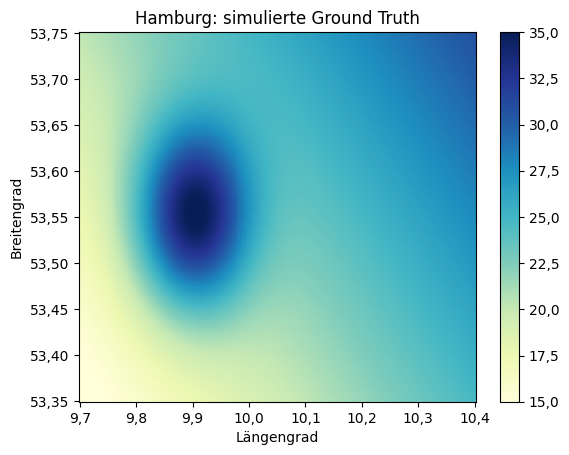

In [2]:
xGroundTruth = np.linspace(9.7, 10.4, 200)
yGroundTruth = np.linspace(53.35, 53.75, 200)
    
res_lon = xGroundTruth[1]-xGroundTruth[0]
res_lat = yGroundTruth[1]-yGroundTruth[0]
Xgt, Ygt = np.meshgrid(xGroundTruth, yGroundTruth)

fine_ground_truth = (np.exp(-1 * ((Xgt-9.9)**2 + (Ygt-53.55)**2)/0.1**2) + 1*(Xgt-9.65 + Ygt - 53.45)) * 15 + 15
plt.pcolormesh(xGroundTruth, yGroundTruth, fine_ground_truth, shading = 'auto', cmap = 'YlGnBu', vmin = 15, vmax = 35)
plt.colorbar()
plt.title('Hamburg: simulierte Ground Truth') 
plt.ylabel('Breitengrad')
plt.xlabel('Längengrad')

#plt.savefig('simulatedGroundTruth_10x10.png', dpi = 600)
plt.savefig('simulatedGroundTruth.png', dpi = 600)
print(np.min(fine_ground_truth))
print(np.max(fine_ground_truth))

In [3]:
# Creates the simulated satellite tiles
def createTiles(x, y, ground_truth, tile_cols = 7, tile_rows = 4):
    cut_cols = [0] + [int((i+1) * len(x)/tile_cols) for i in range(tile_cols - 1)] + [len(x)]
    cut_rows = [0] + [int((i+1) * len(y)/tile_rows) for i in range(tile_rows - 1)] + [len(y)]
    
    centersX = [np.mean(x[cut_cols[i]:cut_cols[i+1]]) for i in range(tile_cols)]
    centersY = [np.mean(y[cut_rows[i]:cut_rows[i+1]]) for i in range(tile_rows)]
    
    coords = []
    values = []
    
    tile_data = np.zeros(ground_truth.shape)
    
    for i in range(tile_cols): #tiles created here
        for j in range(tile_rows):
            coords.append([centersX[i], centersY[j]])
            values.append(np.mean(ground_truth[cut_rows[j]:cut_rows[j+1], cut_cols[i]:cut_cols[i+1]]))
            tile_data[cut_rows[j]:cut_rows[j+1], cut_cols[i]:cut_cols[i+1]] = values[-1]
    
    coords = np.asarray(coords)
    values = np.asarray(values)
    
    return coords, values, tile_data

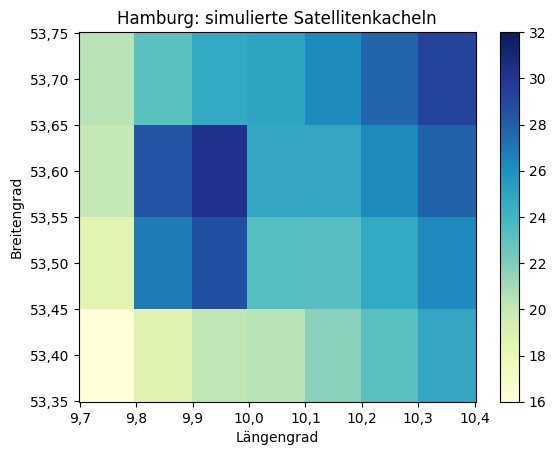

In [4]:
tile_coords, tile_values, tile_data = createTiles(xGroundTruth, yGroundTruth, fine_ground_truth, 7, 4)
plt.title('Hamburg: simulierte Satellitenkacheln')
plt.ylabel('Breitengrad')
plt.xlabel('Längengrad')
plt.pcolormesh(xGroundTruth, yGroundTruth, tile_data, shading = 'auto', cmap = 'YlGnBu', vmin = 16, vmax = 32)
plt.colorbar()

#plt.savefig('simulatedSatellite_10x10.png', dpi = 600)
plt.savefig('simulatedSatellite_30x30.png', dpi = 600)

In [5]:
print(np.max(tile_data))
print(np.min(tile_data))

30.22075734400674
15.951831020545436


In [6]:
#set coordinates of sensor points for Hamburg
point_coords = [[9.944915, 53.5452],
               [10.082139, 53.529433],
               [10.110503, 53.630893],
               [9.831633, 53.531366],
               [9.844191, 53.536222],
               [9.997419, 53.638199],
               [10.053724, 53.59235],
               [9.981625, 53.529168],
               [9.944616, 53.56437],
               [9.943065, 53.555726],
               [9.857199, 53.480982],
               [9.96834, 53.564486],
               [9.957387, 53.560862],
               [10.021966, 53.522906],
               [9.990543, 53.507916]]

no_of_points = len(point_coords)
point_values = []

for i in range(len(point_coords)):
    xIndex = np.argmin(np.abs(xGroundTruth - point_coords[i][0]))
    yIndex = np.argmin(np.abs(yGroundTruth - point_coords[i][1]))
    point_values.append(fine_ground_truth[yIndex, xIndex])

In [7]:
print(np.max(point_values))
print(np.min(point_values))

33.4330177084441
23.180922669968602


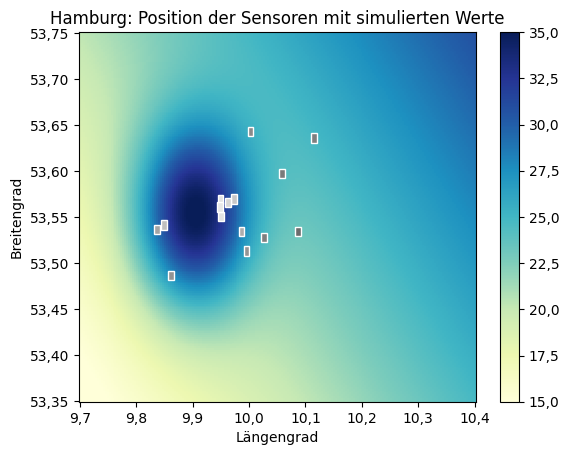

In [8]:
#Plots sensors with simulated values

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.pcolormesh(xGroundTruth, yGroundTruth, fine_ground_truth, shading = 'auto', cmap = 'YlGnBu', vmin = 15, vmax = 35)

for i in range(no_of_points):
    val = point_values[i]
    c = (val- np.min(fine_ground_truth))/(np.max(fine_ground_truth)- np.min(fine_ground_truth))
    rect = plt.Rectangle(point_coords[i], 0.01, 0.01, ec = [1, 1, 1], fc = [c, c, c])
    ax.add_patch(rect)
    
plt.title('Hamburg: Position der Sensoren mit simulierten Werte')
plt.ylabel('Breitengrad')
plt.xlabel('Längengrad')
plt.colorbar()

#plt.savefig('simulatedPoints_10x10.png', dpi = 600)
plt.savefig('simulatedPoints_30x30.png', dpi = 600)

In [9]:
def calcDistance(X, Y, coords):
    distance = np.sqrt((X-coords[0])**2 + (Y - coords[1])**2)
    return distance

In [10]:
def barnesFirstPass(x, y, point_coords, point_values, tile_coords, tile_values, params = None):
    
    '''
    x: one dimensional coordinate array
    y: one dimensional coordinate array
    
    point_coords: coordinates of the point measurements. Array of 2-element arrays, e.g. [[x1, y1], [x2, y2], [x3, y3]]
    point_values: measurment values of the points, in the same order as the coordinates. 1-dimensional array, e.g. [m1, m2, m3]
    
    tile_coords: center position of the tiles. Array of 2-element arrays, e.g. [[x1, y1], [x2, y2], [x3, y3]]
    tile_values: measurment values of the tiles, in the same order as the coordinates. 1-dimensional array, e.g. [m1, m2, m3]
    
    params: default None; otherwise [k_point, k_tile, relative_tileWeight]
    k_point: influence raidus of the point measurements
    k_tile: influence radius of the kacheln measurements
    relative_tilelWeight: relative weight of the tiles. Should be between 0 and 1, defaults to 0.2
    
    return: xpos, ypos, vals; 3 one-dimensional arrays of the x-position, y-position, and interpolated value
    '''
    
    X, Y = np.meshgrid(x, y)
    point_coords = np.asarray(point_coords)
    point_values = np.asarray(point_values)
    tile_coords = np.asarray(tile_coords)
    tile_values = np.asarray(tile_values)
    
    k_point = None
    k_tile = None
    relative_tilelWeight = None
    if params == None or len(params) != 3:
        k_point = 0.03**2
        k_tile = 0.06**2
        relative_tilelWeight = 0.2
    else:
        k_point = params[0]
        k_tile = params[1]
        relative_tilelWeight = params[2]
    
    
    #weights: uses the formula for the weighting defined by Barnes
    point_weights = np.asarray([(1. - relative_tilelWeight) * np.exp(-1 * (calcDistance(X, Y, point_pos))**2/k_point) for point_pos in point_coords])
    tile_weights = np.asarray([relative_tilelWeight * np.exp(-1 * (calcDistance(X, Y, tile_pos))**2/k_tile) for tile_pos in tile_coords])
    
    #multiply weights with the measured values
    weighted_pointValues = np.zeros(point_weights.shape)
    for i in range(len(point_values)):
        weighted_pointValues[i, :] = point_values[i] * point_weights[i, :]
    
    weighted_tileValues = np.zeros(tile_weights.shape)
    for i in range(len(tile_values)):
        weighted_tileValues[i, :] = tile_values[i] * tile_weights[i, :]
        
    summed_weighted_pointValues = np.sum(weighted_pointValues, axis = 0)
    summed_weighted_tileValues = np.sum(weighted_tileValues, axis = 0)
    
    #first pass Barnes Interpolation
    interpol = (summed_weighted_pointValues + summed_weighted_tileValues)/ (np.sum(point_weights, axis = 0) + np.sum(tile_weights, axis = 0))
    
    #create 1-dim arrays for the coordinates and value pairs
    vals = np.ravel(interpol, order = 'C')
    positions = np.vstack([X.ravel(), Y.ravel()])
    
    xpos = positions[0]
    ypos = positions[1]
    
    return xpos, ypos, vals

In [11]:
# Defines the grid on which the interpolation will be performed
xInterpol = np.linspace(9.7, 10.4, numInterpolTiles)
yInterpol = np.linspace(53.35, 53.75, numInterpolTiles)
xpos, ypos, vals = barnesFirstPass(xInterpol, yInterpol, point_coords, point_values, tile_coords, tile_values)

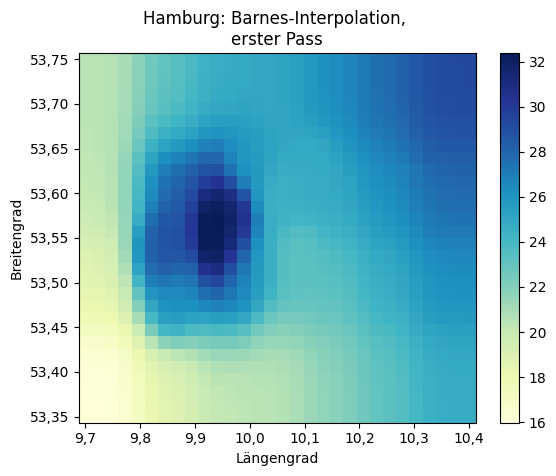

In [12]:
interpol = np.reshape(vals, (len(yInterpol), len(xInterpol))) #reshape due to the array dimensions not matching

plt.pcolormesh(xInterpol, yInterpol, interpol, shading = 'auto', cmap = 'YlGnBu')
plt.title('Hamburg: Barnes-Interpolation, \nerster Pass')
plt.ylabel('Breitengrad')
plt.xlabel('Längengrad')
plt.colorbar()


if numInterpolTiles == 10:
    plt.savefig('barnes1stpass_10x10.png', dpi = 600)
else: # 30
    plt.savefig('barnes1stpass_30x30.png', dpi = 600)

In [13]:
print(np.max(interpol))
print(np.min(interpol))

32.38025702665796
15.973931851232768


4.996028960499899
-2.704532211435801


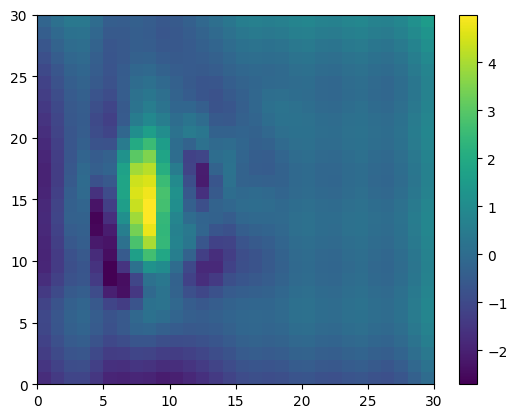

In [14]:
'''
To compare the interpolated data with the ground truth, the ground truth at exactly the position of 
the interpolation grid is caulcuated. 

Change equation for simulated London data

'''
Xgt_coarse, Ygt_coarse = np.meshgrid(xInterpol, yInterpol)

ground_truth = (np.exp(-1 * ((Xgt_coarse-9.9)**2 + (Ygt_coarse-53.55)**2)/0.1**2) + 1*(Xgt_coarse-9.65 + Ygt_coarse - 53.45)) * 15 + 15

residualBarnes = ground_truth - interpol
plt.pcolormesh(residualBarnes)
plt.colorbar()
print(np.max(residualBarnes))
print(np.min(residualBarnes))

In [15]:
def findIndicesOfClosestPoints(x, y, valueCoords): #s
    inds = []
    for i in range(len(valueCoords)):
        dist = ((x - valueCoords[i, 0])**2 + (y - valueCoords[i, 1])**2)**0.5
        ind = np.argmin(dist)
        inds.append(ind)
    inds = np.asarray(inds)
    return inds

def barnesSecondPass(x, y, first_pass, point_coords, point_values, tile_coords = [], tile_values = [], gamma = 0.3, params = None):
    '''
    x: retrieved from 1st pass
    y: retrieved from 2nd pass
    
    first_pass: result from the 1st pass Barnes interpolation
    
    gamma: correction parameter, per definition must lie between 0.2 and 1

    All other variables defined as in the 1st pass 
    '''
    
    point_coords = np.asarray(point_coords)
    point_values = np.asarray(point_values)
    tile_coords = np.asarray(tile_coords)
    tile_values = np.asarray(tile_values)
    
    k_point = None
    k_tile = None
    relative_tilelWeight = None
    
    if params == None or len(params) != 3:
        k_point = 0.03**2
        k_tile = 0.06**2
        relative_tilelWeight = 0.2
    else:
        k_point = params[0]
        k_tile = params[1]
        relative_tilelWeight = params[2]
    
    point_weights = np.asarray([(1. - relative_tilelWeight) * np.exp(-1 * (calcDistance(x, y, point_pos))**2/(gamma * k_point)) for point_pos in point_coords])
    tile_weights = np.asarray([relative_tilelWeight * np.exp(-1 * (calcDistance(x, y, tile_pos))**2/(gamma * k_tile)) for tile_pos in tile_coords])
    
    corrected = np.zeros(first_pass.shape) + first_pass #copy array
    
    points_interpolIndices = findIndicesOfClosestPoints(x, y, point_coords)
    for i in range(len(point_values)):
        diff = point_values[i] - corrected[points_interpolIndices[i]]
        corrected += diff * point_weights[i, :]
    
    tile_interpolIndices = findIndicesOfClosestPoints(x, y, tile_coords)
    for i in range(len(tile_values)):
        diff = tile_values[i] - corrected[tile_interpolIndices[i]]
        corrected += diff * tile_weights[i, :]
    
    return xpos, ypos, corrected

In [16]:
xpos, ypos, vals = barnesFirstPass(xInterpol, yInterpol, point_coords, point_values, tile_coords, tile_values)

fp_reshaped = np.reshape(vals, (len(yInterpol), len(xInterpol)))

#gamma = 0.2
rms_barnes02 = [np.std(ground_truth - fp_reshaped)]
sp = np.zeros(vals.shape) + vals
for i in range(10):
    xpos, ypos, sp = barnesSecondPass(xpos, ypos, sp, point_coords, point_values, tile_coords, tile_values, gamma = 0.2)
    sp_reshaped = np.reshape(sp, (30, 30))
    rms_barnes02.append(np.std(ground_truth - sp_reshaped))

print(np.min(rms_barnes02))

#gamma = 0.4
rms_barnes04 = [np.std(ground_truth - fp_reshaped)]
sp = np.zeros(vals.shape) + vals
for i in range(10):
    xpos, ypos, sp = barnesSecondPass(xpos, ypos, sp, point_coords, point_values, tile_coords, tile_values, gamma = 0.4)
    sp_reshaped = np.reshape(sp, (30, 30))
    rms_barnes04.append(np.std(ground_truth - sp_reshaped))

print(np.min(rms_barnes04))

#gamma = 0.8 
rms_barnes08 = [np.std(ground_truth - fp_reshaped)]
sp = np.zeros(vals.shape) + vals
for i in range(10):
    xpos, ypos, sp = barnesSecondPass(xpos, ypos, sp, point_coords, point_values, tile_coords, tile_values, gamma = 0.8)
    sp_reshaped = np.reshape(sp, (30, 30))
    rms_barnes08.append(np.std(ground_truth - sp_reshaped))

print(np.min(rms_barnes08))

#gamma = 1.0 
rms_barnes10 = [np.std(ground_truth - fp_reshaped)]
sp = np.zeros(vals.shape) + vals
for i in range(2):
    xpos, ypos, sp = barnesSecondPass(xpos, ypos, sp, point_coords, point_values, tile_coords, tile_values, gamma = 1)
    sp_reshaped = np.reshape(sp, (len(yInterpol), len(xInterpol)))
    rms_barnes10.append(np.std(ground_truth - sp_reshaped))
    
print(np.min(rms_barnes10))

0.9237510565148763
0.9114887963344379
0.8947189129536885
0.8930018863184586


In [17]:
def numpy_to_pandas(xpos, ypos, corrected, res_lon, res_lat): #after second pass
    lon = pd.DataFrame(xpos, columns = ['longitude'])
    lat = pd.DataFrame(ypos, columns = ['latitude'])
    interpolated_df = pd.DataFrame(corrected, columns = ['interpolated'])
    
    result_df = pd.concat([interpolated_df, lon, lat], axis = 1)
    result_df = geopandas.GeoDataFrame(result_df, geometry=geopandas.points_from_xy(result_df.longitude, result_df.latitude))
    result_df = geopandas.GeoDataFrame(result_df, crs='EPSG:4326')
    
    tiles = []    
    polygon_df = result_df.copy()

    for index, row in polygon_df.iterrows():
        lon = row.longitude
        lat = row.latitude

        tile = Polygon([
            (lon - 0.5*res_lon, lat + 0.5*res_lat), 
            ((lon + 0.5*res_lon), lat + 0.5*res_lat), 
            ((lon + 0.5*res_lon), (lat - 0.5*res_lat)), 
            (lon - 0.5*res_lon, (lat - 0.5*res_lat))])
        tiles.append(tile)
    polygon_df['geometry'] = tiles
    polygon_df = geopandas.GeoDataFrame(polygon_df, crs='EPSG:4326')
    
    #Warning! Will potentially save the wrong results in the wrong file. Uncomment/Comment before run
    polygon_df.to_file('simulatedInterpolation_as_polygon_HamburgDE_30x30.geojson', driver = 'GeoJSON')
    #polygon_df.to_file('simulatedInterpolation_as_polygon_HamburgDE_10x10.geojson', driver = 'GeoJSON')

In [18]:
numpy_to_pandas(xpos, ypos, sp, res_lon, res_lat)

Text(0, 0.5, 'Standardabweichung')

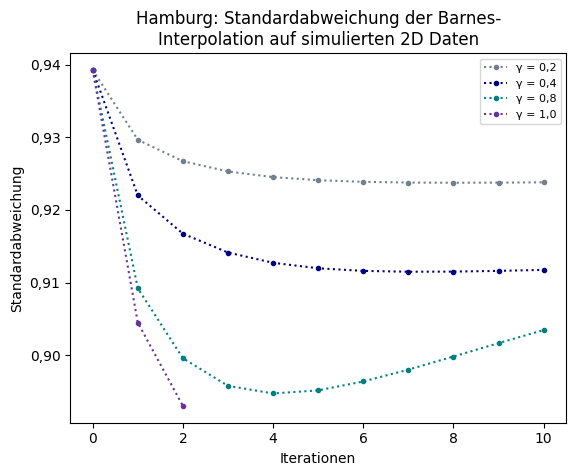

In [19]:
plt.plot(rms_barnes02, marker = '.', ls = ':', color = 'slategrey', label = 'γ = 0,2')
plt.plot(rms_barnes04, marker = '.', ls = ':', color = 'navy', label = 'γ = 0,4')
plt.plot(rms_barnes08, marker = '.', ls = ':', color = 'teal', label = 'γ = 0,8')
plt.plot(rms_barnes10, marker = '.', ls = ':', color = 'rebeccapurple', label = 'γ = 1,0')
plt.legend(prop={'size': 8}, loc = 1)

plt.title('Hamburg: Standardabweichung der Barnes-\nInterpolation auf simulierten 2D Daten')
plt.xlabel('Iterationen')
plt.ylabel('Standardabweichung')

#plt.savefig('standDevBarnes_10x10.pdf')
#plt.savefig('standDevBarnes_30x30.pdf')

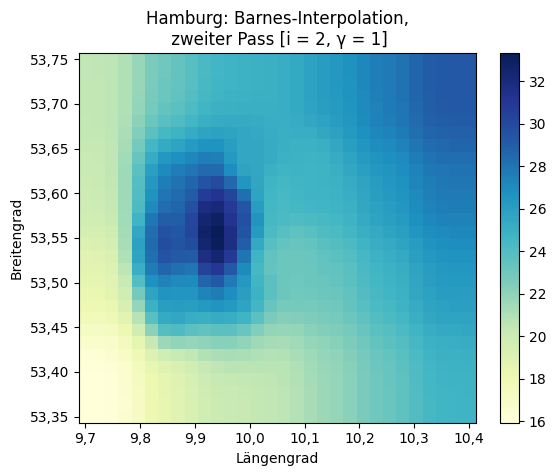

In [20]:
plt.pcolormesh(xInterpol, yInterpol, np.reshape(sp, (len(yInterpol), len(xInterpol))), shading = 'auto', cmap = 'YlGnBu')
plt.title('Hamburg: Barnes-Interpolation,\n zweiter Pass [i = 2, γ = 1]')
plt.ylabel('Breitengrad')
plt.xlabel('Längengrad')
plt.colorbar()

if numInterpolTiles == 10:
    plt.savefig('barnes2ndpass_10x10.png', dpi = 600)
else: # 30
    plt.savefig('barnes2ndpass_30x30.png', dpi = 600)

In [21]:
print(np.max(sp))
print(np.min(sp))

33.312132582581626
15.931740562271246


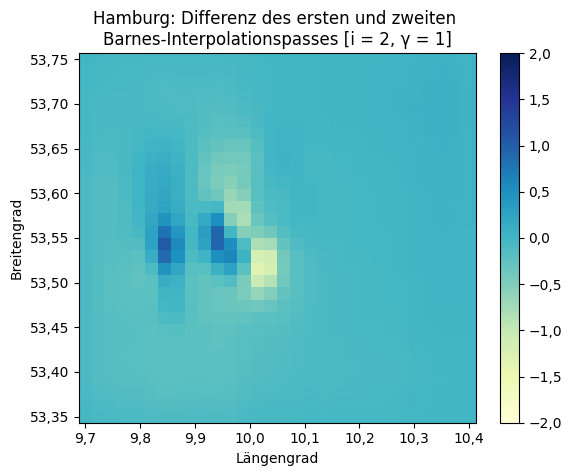

In [22]:
plt.pcolormesh(xInterpol, yInterpol, np.reshape(sp, (len(yInterpol), len(xInterpol))) - np.reshape(vals,(len(yInterpol), len(xInterpol))), shading = 'auto', cmap = 'YlGnBu', vmin = -2.0, vmax = 2.0)
plt.colorbar()
plt.ylabel('Breitengrad')
plt.xlabel('Längengrad')
plt.title('Hamburg: Differenz des ersten und zweiten \nBarnes-Interpolationspasses [i = 2, γ = 1]')

if numInterpolTiles == 10:
    plt.savefig('barnes1and2diff_10x10.png', dpi = 600)
else: # 30
    plt.savefig('barnes1and2diff_30x30.png', dpi = 600)

In [23]:
print(np.min(np.reshape(sp, (len(yInterpol), len(xInterpol))) - np.reshape(vals, (len(yInterpol), len(xInterpol)))))
print(np.max(np.reshape(sp, (len(yInterpol), len(xInterpol))) - np.reshape(vals, (len(yInterpol), len(xInterpol)))))

-1.3231941368791027
1.0402652782990174


5.085961972726199
-2.5090454232665707


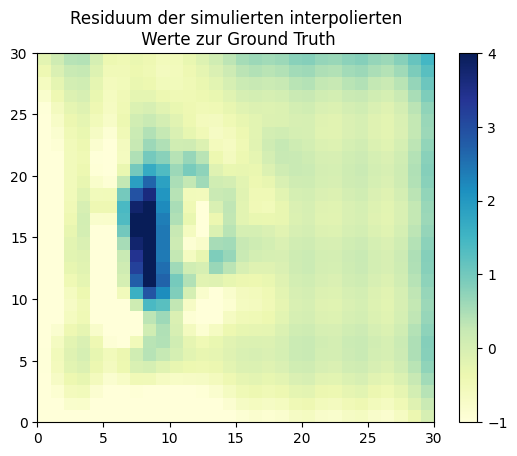

In [24]:
sp_reshaped = np.reshape(sp, (len(yInterpol), len(xInterpol)))

residual_barnes = ground_truth - sp_reshaped
plt.pcolormesh(residual_barnes, shading = 'auto', cmap = 'YlGnBu', vmax = 4, vmin = -1)
plt.title('Residuum der simulierten interpolierten\n Werte zur Ground Truth')
plt.colorbar()

print(np.max(residual_barnes))
print(np.min(residual_barnes))